# Lab 5.01 - Two-sample t-test

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 1 - soft-drink cans

Assume that a soft-drink company is considering a style change to its current can, which has been the company’s trademark for many years. To determine whether this new style is popular with consumers, the company runs a number of focus group sessions around the country. At each of these sessions, randomly selected consumers are allowed to examine the new and traditional styles, exchange ideas, and offer their opinions. 
Eventually, they fill out a form where, among other questions, they are asked to respond to 
the following items, each on a scale of 1 to 7, 7 being the best:
- Rate the attractiveness of the traditional-style can (AO).
- Rate the attractiveness of the new-style can (AN).
- Rate the likelihood that you would buy the product with the traditional-style can (WBO).
- Rate the likelihood that you would buy the product with the new-style can (WBN).

(A and WB stand for "attractiveness" and "would buy", and O and N stand for "old" and "new".)

Use a test to see whether 
consumers rate the attractiveness, and their likelihood to purchase, higher for a new-style can than for the traditional-style can. First make a boxplot.

A few results
- AO vs AN: pvalue=1.32316e-07 < 0.05 => the attractiveness of the new-style can is significantly higher than the attractiveness of the traditional-style can

- WBO vs WBN: pvalue=2.00845995e-06 < 0.05 => the likelihood to buy the new-style can is significantly higher than the likelihood to buy the traditional-style can


In [6]:
df = pd.read_csv('../data/Soft-Drink Cans.csv', sep=';', encoding='utf-8')
df

,Consumer,AO,AN,WBO,WBN
0,1,5,7,4,1
1,2,7,7,6,6
2,3,6,7,7,6
3,4,1,3,1,1
4,5,3,4,1,1
...,...,...,...,...,...
175,176,6,7,5,7
176,177,6,7,6,7
177,178,5,4,4,3
178,179,3,4,1,3


In [10]:
print(df['AO'].mean())
print(df['AN'].mean())



4.411111111111111
4.95


In [11]:
test, p = stats.ttest_rel(df['WBO'],df['WBN'],alternative='less')
p

2.0084599545902635e-06

In [12]:
test, p = stats.ttest_rel(df['AO'],df['AN'],alternative='less')
p

1.3231562068750382e-07

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8348\4273601644.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['AO'], df['AN']], labels=['Attractiveness Old', 'Attractiveness New'])


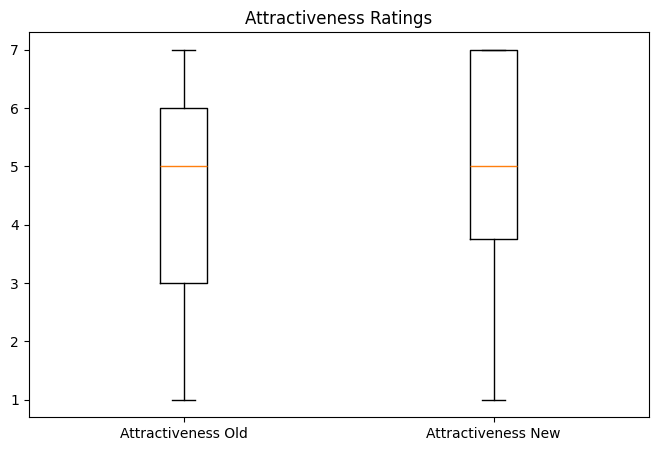

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_8348\4273601644.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['WBO'], df['WBN']], labels=['Would Buy Old', 'Would Buy New'])


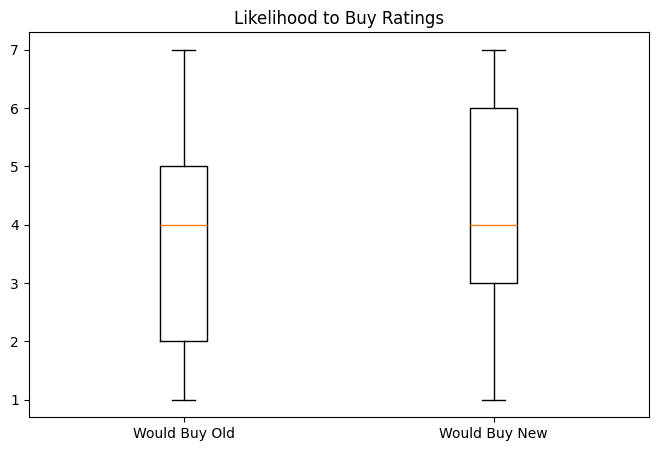

In [8]:
# Boxplot for attractiveness (AO vs AN)
plt.figure(figsize=(8,5))
plt.boxplot([df['AO'], df['AN']], labels=['Attractiveness Old', 'Attractiveness New'])
plt.title('Attractiveness Ratings')
plt.show()

# Boxplot for likelihood to buy (WBO vs WBN)
plt.figure(figsize=(8,5))
plt.boxplot([df['WBO'], df['WBN']], labels=['Would Buy Old', 'Would Buy New'])
plt.title('Likelihood to Buy Ratings')
plt.show()

In [9]:
from scipy.stats import ttest_rel

# Paired t-test for attractiveness
t_stat_ao_an, p_val_ao_an = ttest_rel(df['AN'], df['AO'])

# Paired t-test for likelihood to buy
t_stat_wbo_wbn, p_val_wbo_wbn = ttest_rel(df['WBN'], df['WBO'])

print(f"AO vs AN: t-statistic = {t_stat_ao_an:.3f}, p-value = {p_val_ao_an:.8f}")
print(f"WBO vs WBN: t-statistic = {t_stat_wbo_wbn:.3f}, p-value = {p_val_wbo_wbn:.8f}")


AO vs AN: t-statistic = 5.351, p-value = 0.00000026
WBO vs WBN: t-statistic = 4.758, p-value = 0.00000402
